<a href="https://colab.research.google.com/github/esusrutha/zeroshot/blob/main/S_BERT_KG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
!pip install nltk networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


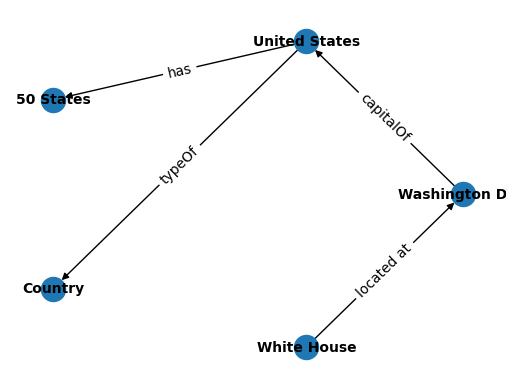

In [90]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

# Define the nodes and relations
knowledge_graph = [
    ('Washington D.C.', 'capitalOf', 'United States'),
    ('United States', 'has', '50 States'),
    ('United States', 'typeOf', 'Country'),
    ('White House', 'located at', 'Washington D.C.')
]

# Create a NetworkX graph
graph = nx.DiGraph()  # Use DiGraph instead of Graph to indicate directed edges

# Iterate through the knowledge graph and retrieve additional information from ConceptNet API
for edge in knowledge_graph:
    source = edge[0]
    relation = edge[1]
    target = edge[2]

    # Make a request to ConceptNet API to fetch additional information
    api_url = f'http://api.conceptnet.io/c/en/{source}?rel=/r/{relation}&end=/c/en/{target}'
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()

        # Extract the weight from the API response
        weight = 1.0  # Default weight if not found
        if 'edges' in data and len(data['edges']) > 0 and 'weight' in data['edges'][0]:
            weight = data['edges'][0]['weight']

        # Add directed edges to the graph
        graph.add_edge(source, target, relation=relation, weight=weight)

# Set node positions using a circular layout
pos = nx.circular_layout(graph)

# Draw nodes and edges with arrowheads
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_edges(graph, pos, arrows=True)  # Set arrows=True for directed edges

# Draw node labels
nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(graph, 'relation')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Display the graph
plt.axis('off')
plt.show()
Knowledge_graph = graph

In [91]:
sentences = []
for edge in Knowledge_graph:
    source = edge[0]
    relation = edge[1]
    target = edge[2]
    sentence = f"{source} {relation} {target}"
    sentences.append(sentence)


In [92]:
from nltk.tokenize import word_tokenize
from collections import Counter

tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
word_counts = Counter([word for sentence in tokenized_sentences for word in sentence])
vocabulary = list(word_counts.keys())


In [93]:
import gensim.downloader as api

glove_model = api.load('glove-wiki-gigaword-300')


In [94]:
word_vectors = {word: glove_model[word] for word in vocabulary if word in glove_model}


In [95]:
knowledge_graph_embedding = []
for sentence in tokenized_sentences:
    sentence_vectors = [word_vectors[word] for word in sentence if word in word_vectors]
    if sentence_vectors:
        avg_vector = sum(sentence_vectors) / len(sentence_vectors)
        knowledge_graph_embedding.append(avg_vector)


In [96]:
for embedding in knowledge_graph_embedding:
    print(embedding)


[ 6.44499063e-03  7.04779997e-02 -2.04746008e-01 -3.02250028e-01
 -2.79864997e-01 -1.29079998e-01 -1.67080000e-01  2.46784002e-01
 -6.71100095e-02 -1.54159999e+00 -8.36150050e-02  2.43716493e-01
 -1.91754997e-01  3.93995009e-02  2.03174993e-01  1.21469989e-01
 -2.28782505e-01  1.19687997e-01  8.91035050e-02 -1.85551494e-01
 -1.91806510e-01  7.31249973e-02 -3.33999991e-02  2.77666003e-01
  2.62699872e-02 -1.45697504e-01  5.94327487e-02 -2.38749981e-02
  2.22784489e-01 -4.25550006e-02 -4.30215001e-01  5.12830019e-01
 -3.20445001e-01  1.12925008e-01 -7.92150021e-01  2.06495017e-01
 -2.87100077e-02 -6.27699941e-02 -2.32075006e-01  3.11802566e-01
  1.57115012e-01  2.48290002e-01 -3.07954997e-01  2.69558489e-01
 -1.36789992e-01 -1.86560005e-01  1.90310001e-01 -1.00961506e-01
 -2.76360005e-01 -8.73314515e-02 -2.46174991e-01  9.85570028e-02
  1.65069997e-02  1.41652495e-01  1.29753992e-01 -2.57650018e-02
 -1.27930000e-01 -1.71725005e-01  2.24216506e-01 -2.86704987e-01
 -2.47759998e-01  3.50775

In [97]:
from sentence_transformers import SentenceTransformer, models


In [98]:
model_name =SentenceTransformer('bert-base-nli-mean-tokens')


In [99]:
from sentence_transformers import SentenceTransformer

model_name = 'bert-base-nli-mean-tokens'
sbert_model = SentenceTransformer(model_name)

In [100]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [102]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [104]:
import nltk
from transformers import AutoTokenizer

# Load the pre-trained S-BERT model tokenizer
model_name = "sentence-transformers/bert-base-nli-mean-tokens"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Download the list of common English words from nltk
nltk.download("words")
common_words = set(nltk.corpus.words.words())

# Get the vocabulary words from the S-BERT model
vocab = tokenizer.get_vocab()
vocab_words = list(vocab.keys())

# Filter the vocabulary words to keep only the common English words
common_vocab_words = [word for word in vocab_words if word.lower() in common_words]

# Get the most common vocabulary words based on their frequencies
top_n = 50
common_vocab_freqs = [vocab[word] for word in common_vocab_words]
most_common_vocab = sorted(zip(common_vocab_words, common_vocab_freqs), key=lambda x: x[1], reverse=True)[:top_n]

# Store the most common vocabulary words in a list
stored_words = [word for word, _ in most_common_vocab]

# Print the stored vocabulary words
for word in stored_words:
    print(word)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


thyroid
nitrate
genealogical
dowry
collarbone
arsenic
pudding
disgrace
wreath
wince
inhuman
bobbed
papyrus
flourishing
penitentiary
inflated
boredom
abolitionist
squeak
enthusiast
infiltrate
upstate
rosewood
patrice
vet
foreigner
colossal
earthly
deprivation
taluka
stanza
embroidery
adventurer
unbroken
lough
adamant
polka
boardwalk
reindeer
attache
persist
enamel
effortlessly
yearning
loosen
ie
decorate
covent
strive
tread


In [105]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
vocabulary_embeddings=model.encode(stored_words)
print(vocabulary_embeddings)

[[ 0.4887316   0.06500868  0.47772422 ... -0.40955648  0.46699142
   0.07069289]
 [ 0.04716921  0.11385528  1.4651852  ...  0.26741937  0.7261961
   0.02695823]
 [-0.12113438  0.06735776  1.866991   ... -0.4632953  -0.17647363
   0.27586946]
 ...
 [-0.2912015  -0.5358622   2.1869428  ... -0.28055057 -0.13021672
   0.34846464]
 [ 0.25023955 -0.3493019   2.8944747  ... -0.4670918  -0.5353251
  -0.12669642]
 [ 0.5686533   0.12271688  2.1050196  ...  0.25418982 -0.1013087
   0.20984882]]


In [106]:
word_vectors = {word: glove_model[word] for word in stored_words if word in glove_model}

In [107]:
knowledge_graph_embedding = []
for word in stored_words:
    if word in word_vectors:
        word_vector = word_vectors[word]
        knowledge_graph_embedding.append(word_vector)

for embeddings in knowledge_graph_embedding:
    print(embeddings)


[-0.60309    0.43521    0.34076   -0.19945   -0.18648   -0.15395
 -0.3279    -0.18652   -0.10225   -0.27165   -0.81234    0.16711
 -0.65959   -0.093957  -0.65127    0.27834   -0.065087  -0.025754
 -0.46885    0.56334   -0.98922   -1.0424     0.15841   -0.53695
 -1.0966    -0.11377    0.12691   -0.28586   -0.38626    0.04408
  0.0095898  0.46223    0.40411   -0.35763    0.24802   -0.44011
 -0.049788   0.083146   0.23668    0.42204   -0.28741    0.45853
  0.42975   -1.1337    -0.010538  -0.064561  -0.30434    0.29693
 -0.51822    0.1545    -0.6576     0.19796    0.70584   -0.14076
 -0.30189   -0.38828   -0.26378    0.29245    0.50493    0.52774
 -0.15774   -0.13065    0.86067   -0.76376   -0.52396   -0.34766
 -0.76526    1.2282    -0.56637    0.40671    0.64794    0.2427
  0.37366    0.16699   -0.048311  -0.8844    -0.58703   -0.74998
  0.19419    0.25094   -0.28921    0.2612     0.85479    0.52452
 -0.29366    1.0324    -0.044289  -0.090738  -0.42323   -0.22433
 -0.50208   -0.052621  -0

In [108]:
import numpy as np

def learn_projection_matrix(embeddings, Y):
    # Center the S-BERT embeddings
    embeddings_centered = embeddings - np.mean(embeddings, axis=0)

    # Center the knowledge graph embeddings
    embedding_centered = embedding - np.mean(Y, axis=0)

    # Perform singular value decomposition on X
    U, S, VT = np.linalg.svd(embeddings_centered, full_matrices=False)

    # Construct the projection matrix
    P = VT.T @ U.T

    # Project the centered knowledge graph embeddings
    embedding_projected = embeddings_centered @ P

    return P, embedding_projected

# Example usage
# Assume X and Y are the S-BERT embeddings and knowledge graph embeddings respectively

# Generate random S-BERT embeddings and knowledge graph embeddings for demonstration
np.random.seed(42)
embeddings = np.random.rand(100, 50)
embedding = np.random.rand(100, 100)

# Learn the projection matrix
projection_matrix, projected_embeddings = learn_projection_matrix(embeddings, embedding)

# Print the projection matrix
print("Projection Matrix:")
print(projection_matrix)

# Print the projected knowledge graph embeddings
print("Projected Knowledge Graph Embeddings:")
print(projected_embeddings)


Projection Matrix:
[[-0.09530814  0.17247475 -0.09358466 ...  0.14192177 -0.1597433
  -0.03208431]
 [ 0.12331812  0.09035316  0.07318327 ... -0.00850685 -0.00285291
  -0.13983809]
 [ 0.06349116  0.14512936 -0.14235402 ...  0.08170926 -0.12210049
   0.02182195]
 ...
 [-0.00057901  0.09942775  0.02374778 ... -0.07940023  0.06602151
  -0.10459959]
 [-0.01308586 -0.15820529 -0.14251553 ... -0.1463997   0.06872969
   0.10336344]
 [-0.11006908 -0.08220933 -0.03814088 ...  0.16363046  0.1060267
  -0.01839051]]
Projected Knowledge Graph Embeddings:
[[ 1.29982025 -0.02232146 -0.10162462 ... -0.03898049 -0.36609878
  -0.02276538]
 [-0.02232146  1.55056445 -0.08702494 ... -0.05133531 -0.23956438
  -0.0634575 ]
 [-0.10162462 -0.08702494  1.49006846 ...  0.00516557  0.02108053
   0.14986073]
 ...
 [-0.03898049 -0.05133531  0.00516557 ...  1.37167816 -0.03615348
  -0.33672569]
 [-0.36609878 -0.23956438  0.02108053 ... -0.03615348  1.32426477
  -0.04661303]
 [-0.02276538 -0.0634575   0.14986073 ... -

In [109]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
from sklearn.datasets import fetch_20newsgroups

# Fetch the 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups()

# Get the list of categories
categories_list = newsgroups_data.target_names

# Print the categories
for label in categories_list:
    print(label)


alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [111]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
labels_embeddings=model.encode(label)
print(labels_embeddings)

[ 2.45756209e-01  5.91305017e-01  1.32814133e+00 -1.26073539e-01
  1.33296385e-01  6.75171465e-02  6.65551424e-01  7.02646911e-01
 -1.04869716e-01 -6.65794790e-01 -1.14394653e+00  1.12623775e+00
  5.32939792e-01  9.93040264e-01  6.19690567e-02  2.33048677e-01
 -5.17691553e-01 -3.58770013e-01  3.40320826e-01 -1.18802711e-01
 -2.06725150e-01 -3.34257722e-01 -4.24743831e-01 -1.17487155e-01
  3.16874832e-01 -1.26082689e-01 -3.84350985e-01 -1.37222862e+00
 -5.52270472e-01 -1.14862181e-01  3.63281608e-01 -2.70295709e-01
  9.21263158e-01 -9.31076705e-02  5.31410158e-01  3.10967118e-01
  3.88710529e-01  2.93576837e-01 -1.39761537e-01 -1.23172618e-01
  5.25234461e-01  2.16960907e-04  1.18535221e+00  2.96403736e-01
  1.66669324e-01 -4.28105831e-01 -1.56251878e-01  4.46004570e-01
 -1.29986227e+00 -5.19923031e-01 -4.05445606e-01 -7.34721482e-01
  6.19266868e-01  8.02624941e-01 -4.48033452e-01  3.19362581e-01
  2.44055390e-01 -7.06705570e-01  8.07696760e-01  4.99537170e-01
 -3.16229388e-02 -2.58573

In [112]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [114]:
import re
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.datasets import fetch_20newsgroups

# Fetch the 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups()

# Get the list of categories
categories_list = newsgroups_data.target_names

# Preprocess and extract sentences from each category
for category in categories_list:
    # Initialize a list to store preprocessed sentences
    preprocessed_sentences = []

    # Get documents for the current category
    documents = fetch_20newsgroups(subset='all', categories=[category])

    for document in documents.data:
        # Remove question marks, special symbols, numbers, and URLs
        text = re.sub(r'\?', '', document)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'http\S+|www\S+', '', text)

        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text into sentences
        sentences = sent_tokenize(text)

        # Preprocess and add sentences to the list
        for sentence in sentences:
            # Remove leading/trailing whitespaces
            sentence = sentence.strip()

            # Skip empty sentences
            if not sentence:
                continue

            preprocessed_sentences.append(sentence)

    # Print the preprocessed sentences
    for sentence in preprocessed_sentences:
        print(sentence)
    print("\n")


from acoopermacccmacalstredu turin turambar me department of utter misery
subject re societally acceptable behavior
organization macalester college
lines 

in article csasnewscsouiucedu cobbalexialisuiucedu mike cobb writes
 i guess im delving into a religious language area  what exactly is morality 
 or morals  

i hope there is not one with a subject like this you just have a spiral  what
would then be a morality of a morality of morals  labels dont make arguments 
one really needs a solid measuring stick by which most actions can be
interpreted even though this would hardly seem moral  for example the best
thing for me is to ensure that i will eat and drink enough  hence all actions
must be weighed against this one statement  whatever helps this goal is
moral whatever does not is immoral

of course this leads such a blank space there are so many different ways to
fulfill a goal one would need a hypermorality to apply to just the methods

i never thought of eating meat to be moral or

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
design of the box is all wrong wouldve been better if ms had put most
of windows on a plugin rom card from day one priced at  or
so people woulda loved it

apple had the right idea just stumbled a bit in the execution

pete


peter l wargo       wargoplsunsoeclarksonedu  email saves trees
documentation                                     it also makes the
enable software       x          world smaller
from doucetfsquadmnorg andrew geweke
subject lc ii slowdowns
organization tfsquad public access usenet st paul mn    
lines 

        i am currently managing among many other labs a lab with three 
lc iis a mac plus with  mb external hd and a laserwriter ii ntx my 
problem the lc iis seem to intermittently slow to a snails pace
        these lc iis have  mb ram k vram and a quantum lps hd 
installed i have reformatted the drive with hard disk toolkit  and 
it gives a very respectable  overall rating to this drive so its not 
the drive i h

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
of course these postings sould be in soccultureus but if we reduce
crime here it ll mean less car insurance rates thus we could spend
more money on modifing our cars now my posting is recautostech 
revelant

vlasis  theodore


software engineer
idb mobile communications

sig under development 

i remember this happening on the i through michigan and ohio several
years back a group of guys in an old beater would rear end a car
usually out of state or canadians you stop and they smack you with a bb
bat at least they didnt kill you for the sake of a car
i think the cops put out decoys and this calmed down for a while

vlasis are you safe walking through germany if you are a refugee
from musicerichtriumfca fred w bach
subject re warningplease read
organization triumf triuniversity meson facility
lines 
distribution world
nntppostinghost erichtriumfca
newssoftware vaxvms vnews     

in article aprconvexcom tobiasconvexcom allen tobias write

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



from maynardramseycslaurentianca roger maynard
subject re wings take game one
keywords the detroit red wings    the toronto maple leafs  
organization dept of computer science laurentian university sudbury on
lines 

in qvosrmsuinfoclmsuedu vergolineulerlbsmsuedu david vergolini writes

  the detroit red wings put a lot of doubter on ice tonight with a   
washing of the toronto maple leafs  all you toronto fans have now seen the
power of the mighty red wing offense  torontos defense in no match for the
wing offense  as for the defense probert kennedey and primeau came out

did they move probert back to defense  why did i see him parking his ass
in front of potvin all night  somebody is going to have to discipline
probert if the leafs want to win the series  perhaps a fresh clark should
hit the ice at the end of a long probert shift and straigten him out for
a while


 

cordially as always                      maynardramseycslaurentianca 
                                           so m

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 of time space and money as well as it makes it to tempting to lend
 out the backups 

weve destroyed about six sets of original microsoft word for mac  and  
word for windows may have been a bad batch of disks  dont have the  
faintest idea what happened to them they just went bad  werent stored  
near any magnetic fields or otherwise mistreated indeed they were only  
used once  given this and the massive headaches finding a working set of  
disks to fix some of the machines that periodically go down id say  
having working backups is a godsend  i sure wish wed had them sometimes  
i think murphys law holds true more often than newtons when we needed  
them  i think its sortof like snake antivenin   of the time you  
have absolutely no use for it but when you need it boy do you ever need  
it


dittos  in fact  at work where things are dead if the backup
is no good i insist on having at least a  level backup system  
it seems that wh

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
pass in front of the moon each night please alert local clubs to the
telephone newsline and general public as mir can cause quite a stir

tony ryan astronomy  space new international magazine available from
              astronomy ireland pobox  dublin  ireland
 issues one year sub uk  pounds us surface add us airmail
accessvisamastercard accepted give number expiration date nameaddress

  worlds largest astro soc per capita  unless you know better 
tel  uknireland  eire cost up to p per min
organization queens university at kingston
from graydon saundrsgqucdnqueensuca
subject re what if the ussr had reached the moon first
 dxbaries apryangearlhamedu
 dxbvirgo apryangearlhamedu
lines 

this is turning into whats a moonbase good for and i ought
not to post when ive a hundred some odd posts to go but i would
think that the real reason to have a moon base is economic

since someone with space industry will presumeably have a much
larger g

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.

 the brady bunch the brady bunch this is how we got stuck
 with the brady bunch
from djhzeustamuedu harty daniel joseph
subject re cnn for sale
organization texas am university academic computing services
lines 
distribution usa
nntppostinghost zeustamuedu
newssoftware vaxvms vnews     

in article qtptgegeraldoccutexasedu mikeyccwfccutexasedu strider writes
in article aejdcmuvmbitnet aejdcmuvmbitnet writes
in article uupcbyobsccsicom jimwrayyobsccsicom jim wray
says

 bill vojak
hey if you can get it together im all for it i too am one of the poor
a college student get a bank account set aside and set aside a big ass
data base and you will get my contribution im setting aside as of now  
a month not a slew of cash to be sure but its the best i can do let me
know what you guys come up with im sure as hell not going anywhere

email to djhrigeltamuedu
death to tyrants  
							kane
better ideas anyone havent heard em yet
from hadcrjamad

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
new zealand was willing to cooperate and south georgia island
was virtually uninhabited except for a whaling station on the
northeast coast  the whaling station was some  miles away from
the secret new installation which was being built but britain
took no chances  in  the whaling station was closed down 
since that time there have been no inhabitants on south georgia
island except for a few dozen alleged antarctic scientists

   construction of the secret naval facilitiestwo in new
zealand one on south georgia islandbegan in the early s 
the techniques were adapted from those used previously to build
other large underground facilities such as the norad
installation inside cheyenne mountain colorado however these
techniques were adapted in radically new ways to achieve
construction access directly from the sea instead of overland 
in this way the sheltering mountain was left undisturbed in
appearance both during and after construction


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
sentences_embeddings=model.encode(sentence)
print(sentences_embeddings)

[ 1.09040253e-02  1.33285344e+00  6.66448712e-01  1.34605080e-01
 -5.37390076e-03 -5.14817715e-01  1.49951875e+00 -3.78864348e-01
  2.08912827e-02 -1.36235312e-01 -5.53271055e-01  4.55447197e-01
  2.11144667e-02  4.65425134e-01 -1.01658332e+00  8.43070626e-01
 -2.37012118e-01 -3.39166582e-01 -3.07052672e-01  1.24860376e-01
 -2.88823456e-01 -6.65833354e-01  5.14435291e-01  4.39306408e-01
  1.37753367e+00  1.06917989e+00 -2.22981274e-01  5.54556809e-02
 -1.87858999e+00  5.81222057e-01 -1.29639447e-01 -1.96235284e-01
 -3.03638667e-01 -6.40681013e-02 -1.47274435e-01  6.71839833e-01
  6.75201416e-01 -4.76230741e-01  3.70623231e-01  1.99202403e-01
 -1.18417293e-01  3.49693447e-01 -2.60720611e-01 -2.06658002e-02
 -3.42278302e-01 -2.76799947e-02  1.12435544e+00  3.08227062e-01
  5.06314337e-01 -7.84928381e-01  6.58134222e-01  4.43810493e-01
  3.36649120e-01  1.12226516e-01  1.45687491e-01 -7.20396757e-01
  4.11478393e-02 -1.00916481e+00 -8.52265596e-01 -7.12945640e-01
 -1.47198367e+00  3.36915

In [117]:
import numpy as np

def project_embedding(labels_embeddings, projection_matrix):
    # Subtract the mean from the embedding
    embedding_centered = labels_embeddings - np.mean(embedding)

    # Project the embedding using the projection matrix
    projected_embedding = embedding_centered @ projection_matrix

    return projected_embedding

# Example usage
# Assume labels_embeddings is the S-BERT embedding you want to project

# Generate a random S-BERT embedding for demonstration
np.random.seed(42)
embedding = np.random.rand(50)

# Project the embedding using the learned projection matrix
projected_embedding = project_embedding(labels_embeddings, projection_matrix)

# Print the projected embedding
print("Projected Embedding:")
print(projected_embedding)


Projected Embedding:
[ 1.24905489 -0.03420147 -0.14542063  0.04100897 -0.08743786 -0.17306443
 -0.35092474  0.23088468  0.16604847  0.11809734  0.07968454  0.06093224
  0.18252234  0.46956398 -0.02680926  0.14240083  0.07955954 -0.07759807
 -0.25907078 -0.07220667  0.1285254   0.08635514  0.01399185  0.12637429
 -0.10214171 -0.0855411   0.33414586 -0.07746083 -0.24873033 -0.06900564
 -0.19455283  0.09721813  0.23717756 -0.25134981 -0.14633439 -0.22249226
  0.09052631 -0.07802594  0.06805935 -0.22431368  0.14466879  0.24977887
 -0.04443596  0.15847405 -0.03292778 -0.06214756  0.05559019 -0.16907212
 -0.19535356 -0.08520752  0.20067156 -0.09861238 -0.05479009 -0.02727263
  0.12320951  0.036354    0.26777095 -0.14043754 -0.03188046 -0.07862663
 -0.3594134   0.00940922 -0.12366804 -0.24341758  0.08523264 -0.04530935
  0.04021443 -0.22181344  0.06066966  0.07489775 -0.1521379  -0.20047904
 -0.01882158 -0.06363545 -0.21316807  0.28227307 -0.04092625  0.05881964
 -0.10054787  0.02669802  0.31

In [119]:
import numpy as np

def project_embedding(sentences_embeddings, projection_matrix):
    # Subtract the mean from the embedding
    embedding_centered = sentences_embeddings - np.mean(embedding)

    # Project the embedding using the projection matrix
    projected_embeddings = embedding_centered @ projection_matrix

    return projected_embeddings

# Example usage
# Assume embedding is the S-BERT embedding you want to project

# Generate a random S-BERT embedding for demonstration
np.random.seed(42)
sentences_embeddings = np.random.rand(50)

# Project the embedding using the learned projection matrix
projected_embeddings = project_embedding(sentences_embeddings, projection_matrix)

# Print the projected embedding
print("Projected Embedding:")
print(projected_embeddings)


Projected Embedding:
[ 1.24905489 -0.03420147 -0.14542063  0.04100897 -0.08743786 -0.17306443
 -0.35092474  0.23088468  0.16604847  0.11809734  0.07968454  0.06093224
  0.18252234  0.46956398 -0.02680926  0.14240083  0.07955954 -0.07759807
 -0.25907078 -0.07220667  0.1285254   0.08635514  0.01399185  0.12637429
 -0.10214171 -0.0855411   0.33414586 -0.07746083 -0.24873033 -0.06900564
 -0.19455283  0.09721813  0.23717756 -0.25134981 -0.14633439 -0.22249226
  0.09052631 -0.07802594  0.06805935 -0.22431368  0.14466879  0.24977887
 -0.04443596  0.15847405 -0.03292778 -0.06214756  0.05559019 -0.16907212
 -0.19535356 -0.08520752  0.20067156 -0.09861238 -0.05479009 -0.02727263
  0.12320951  0.036354    0.26777095 -0.14043754 -0.03188046 -0.07862663
 -0.3594134   0.00940922 -0.12366804 -0.24341758  0.08523264 -0.04530935
  0.04021443 -0.22181344  0.06066966  0.07489775 -0.1521379  -0.20047904
 -0.01882158 -0.06363545 -0.21316807  0.28227307 -0.04092625  0.05881964
 -0.10054787  0.02669802  0.31

In [122]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_labels(sentence_embedding, projected_embeddings, categories_list):
    # Calculate cosine similarity between the sentence embedding and projected embeddings
    similarities = cosine_similarity(sentence_embedding.reshape(1, -1), projected_embeddings)

    # Find the index of the most similar projected embedding
    most_similar_index = np.argmax(similarities)

    # Retrieve the corresponding label
    predicted_label = categories_list[most_similar_index]

    return predicted_label

# Example usage
# Assume sentence_embedding is the projected embedding of a sentence
# Assume projected_embeddings is the matrix of projected embeddings for all labels
# Assume labels is the list of labels corresponding to the projected_embeddings

# Generate random projected embeddings and labels for demonstration
np.random.seed(42)
projected_embeddings = np.random.rand(100, 50)
labels = ['label1', 'label2', 'label3', ...]  # Replace ... with the remaining labels

# Generate a random sentence embedding for demonstration
sentence_embedding = np.random.rand(50)

# Predict the label for the sentence
predicted_label = predict_labels(sentence_embedding, projected_embeddings, categories_list)

# Print the predicted label
print("Predicted Label:", predicted_label)


IndexError: ignored

In [115]:
import nltk
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

# Load the dataset
newsgroups_data = fetch_20newsgroups(subset='all')

# Get the category labels and corresponding text documents
categories = newsgroups_data.target_names
documents = newsgroups_data.data

# Initialize a dictionary to store the vocabulary for each category
category_vocabularies = {}

# Define stopwords and punctuation marks
stopwords_set = set(stopwords.words('english'))
punctuation_set = set(punctuation)

# Iterate through each category
for category in categories:
    # Filter documents by category
    category_documents = [doc for doc, target in zip(documents, newsgroups_data.target) if newsgroups_data.target_names[target] == category]

    # Preprocess the text (example: tokenization and lowercase conversion)
    preprocessed_documents = [word_tokenize(doc.lower()) for doc in category_documents]

    # Filter out stopwords, punctuation, numbers, and non-word characters
    filtered_documents = [[word for word in doc if word.isalpha() and word not in stopwords_set] for doc in preprocessed_documents]

    # Create a vocabulary for the category
    category_vocabulary = set([word for doc in filtered_documents for word in doc])

    # Store the category vocabulary
    category_vocabularies[category] = category_vocabulary

# Find the common vocabulary across all categories
common_vocabulary = set.intersection(*category_vocabularies.values())

# Print the common vocabulary
print("Common Vocabulary:")
print(f"Vocabulary size: {len(common_vocabulary)}")
print(f"Sample words: {list(common_vocabulary)[:100]}")


Common Vocabulary:
Vocabulary size: 1434
Sample words: ['except', 'passing', 'ohio', 'design', 'local', 'basically', 'official', 'tape', 'terms', 'dave', 'pretty', 'determined', 'ago', 'replies', 'mean', 'past', 'ahead', 'compared', 'idea', 'capital', 'ignorance', 'beginning', 'lewis', 'home', 'removing', 'missing', 'expect', 'becomes', 'favorite', 'send', 'regarding', 'department', 'whose', 'read', 'numbers', 'term', 'run', 'book', 'item', 'automatic', 'bob', 'etc', 'knowledge', 'mine', 'forth', 'assuming', 'proud', 'canada', 'sign', 'earth', 'running', 'earlier', 'family', 'purpose', 'present', 'lot', 'memory', 'care', 'improved', 'used', 'actually', 'ie', 'changed', 'money', 'designed', 'might', 'suit', 'led', 'interest', 'fall', 'boulder', 'show', 'laboratory', 'project', 'especially', 'display', 'jump', 'prefer', 'life', 'see', 'rule', 'wonderful', 'cover', 'track', 'bit', 'decided', 'usenet', 'everybody', 'along', 'deleted', 'near', 'necessarily', 'united', 'lies', 'stanford', 'f